In [1]:
import pandas as pd


In [2]:
data = pd.read_csv("encoded_dataset.csv")

In [4]:
from sklearn.preprocessing import StandardScaler

# Drop target column if present; here we assume all columns are features
X = data.copy()

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print(X_scaled)

[[-1.          0.88020109 -1.05279808 ... -1.60723742  1.04856175
   1.05815996]
 [-1.          0.88020109  0.94984976 ...  1.19768093  1.04856175
   1.05815996]
 [-1.         -1.13610402 -1.05279808 ...  1.54829572  1.04856175
   1.05815996]
 ...
 [ 1.          0.88020109  0.94984976 ...  1.54829572  1.04856175
  -0.78076781]
 [ 1.          0.88020109  0.94984976 ...  0.84706614 -2.83842972
  -0.78076781]
 [ 1.          0.88020109  0.94984976 ...  0.14583655  1.04856175
  -1.70023169]]


In [55]:
from sklearn.decomposition import PCA


In [56]:
# Assuming df is your DataFrame and 'Diabetes_binary' is your target
X = data.drop(columns=['Diabetes_binary'])
y = data['Diabetes_binary']


In [46]:
pca = PCA(n_components=10)
pca_scaled_data=pca.fit_transform(X_scaled)

In [47]:
# variance for each pca1,2,3..10 as ratio
pca.explained_variance_ratio_


array([0.17757716, 0.08200187, 0.06073128, 0.05520722, 0.05410256,
       0.05096963, 0.04679979, 0.04276147, 0.04241221, 0.03958477])

In [48]:
X_scaled.shape


(70692, 22)

In [49]:
pca_scaled_data.shape

(70692, 10)

In [51]:
pca_df = pd.DataFrame(pca_scaled_data, columns=[f'PCA_Component_{i+1}' for i in range(10)])
print("First 5 rows of PCA Components:")
print(pca_df.head())


First 5 rows of PCA Components:
   PCA_Component_1  PCA_Component_2  PCA_Component_3  PCA_Component_4  \
0        -0.949512        -0.706168         0.241218         0.888698   
1         0.379952         1.837689        -1.131511         1.617858   
2        -2.580439         0.944821         0.735650         0.508995   
3        -0.960446         1.791550         0.028703         1.123424   
4        -2.288534         0.152830        -0.103105         0.968591   

   PCA_Component_5  PCA_Component_6  PCA_Component_7  PCA_Component_8  \
0         2.221292         0.499763        -0.929616         0.222430   
1        -0.584409         0.971298        -1.655338         1.079751   
2        -0.086745         0.367394        -0.808565        -0.270495   
3         0.278299        -0.709428         0.440512        -0.346977   
4        -0.057429         0.109005        -0.096023        -0.859283   

   PCA_Component_9  PCA_Component_10  
0         0.453647          0.288586  
1        -1.

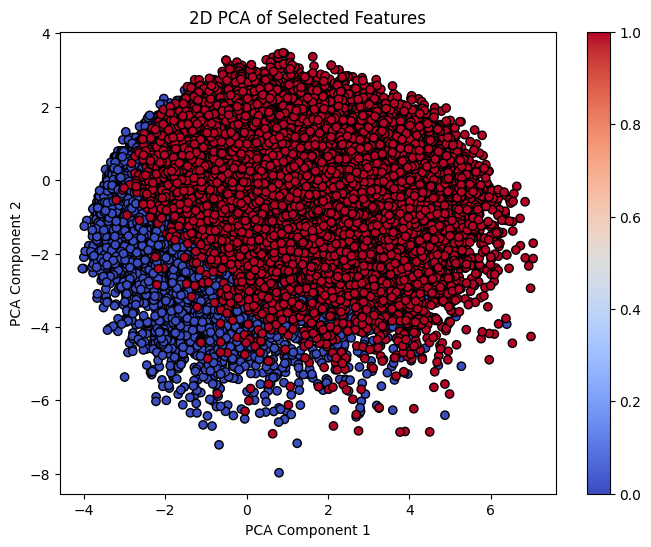

In [58]:
plt.figure(figsize=(8,6))
plt.scatter(pca_scaled_data[:,0], pca_scaled_data[:,1], c=data['Diabetes_binary'], cmap='coolwarm', edgecolor='k')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('2D PCA of Selected Features')
plt.colorbar()
plt.show()